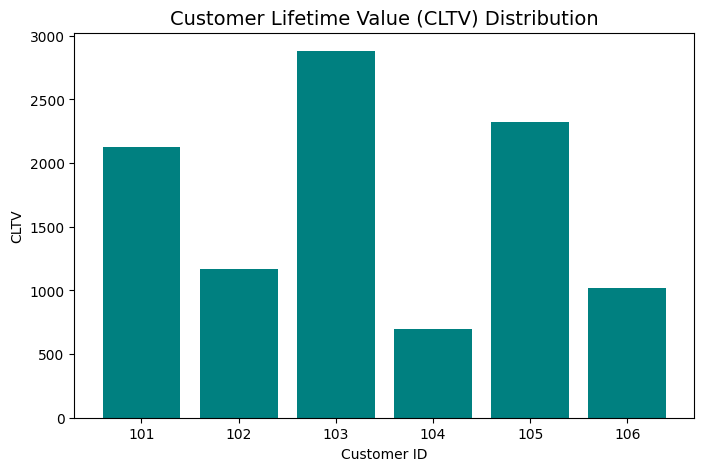

   CustomerID  AvgMonthlySpend  Churn_Probability    CLTV
0         101       104.166667               0.15  2125.0
1         102        75.000000               0.35  1170.0
2         103       133.333333               0.10  2880.0
3         104        56.000000               0.50   700.0
4         105       126.086957               0.20  2320.0
5         106        73.913043               0.40  1020.0


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# ---------------------------
# 1. Sample E-commerce Dataset
# ---------------------------
data = {
    'CustomerID': [101, 102, 103, 104, 105, 106],
    'FirstPurchaseDate': [
        '2021-01-10', '2020-11-25', '2021-03-01',
        '2020-08-15', '2021-05-02', '2020-10-05'
    ],
    'LastPurchaseDate': [
        '2023-01-12', '2022-12-20', '2023-03-15',
        '2022-10-05', '2023-04-18', '2022-09-09'
    ],
    'TotalSpend': [2500, 1800, 3200, 1400, 2900, 1700],
    'Transactions': [15, 10, 20, 8, 18, 9],
    'Churn_Probability': [0.15, 0.35, 0.10, 0.50, 0.20, 0.40]
}

df = pd.DataFrame(data)
df['FirstPurchaseDate'] = pd.to_datetime(df['FirstPurchaseDate'])
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'])

# ---------------------------
# 2. Feature Engineering
# ---------------------------
df['TenureDays'] = (df['LastPurchaseDate'] - df['FirstPurchaseDate']).dt.days
df['TenureMonths'] = (df['TenureDays'] / 30.44).astype(int)   # Avg month length
df['AvgMonthlySpend'] = df['TotalSpend'] / df['TenureMonths']
df['AvgTransactionValue'] = df['TotalSpend'] / df['Transactions']

# ---------------------------
# 3. CLTV Calculation
# Formula: CLTV = (Avg Monthly Spend * Tenure) * (1 - Churn Probability)
# ---------------------------
df['CLTV'] = (df['AvgMonthlySpend'] * df['TenureMonths']) * (1 - df['Churn_Probability'])

# ---------------------------
# 4. Visualization
# ---------------------------
plt.figure(figsize=(8,5))
plt.bar(df['CustomerID'], df['CLTV'], color='teal')
plt.title("Customer Lifetime Value (CLTV) Distribution", fontsize=14)
plt.xlabel("Customer ID")
plt.ylabel("CLTV")
plt.show()

print(df[['CustomerID', 'AvgMonthlySpend', 'Churn_Probability', 'CLTV']])


In [ ]:
# ---------------------------
# 5. Advanced Plotly Visualizations
# ---------------------------

import plotly.express as px
import plotly.graph_objects as go

# 1. Interactive Bar Chart - CLTV by Customer
fig1 = px.bar(
    df,
    x="CustomerID", y="CLTV",
    color="Churn_Probability",
    text="CLTV",
    title="Customer Lifetime Value (CLTV) by Customer",
    labels={"CLTV":"Lifetime Value", "CustomerID":"Customer ID"},
    color_continuous_scale="Viridis"
)
fig1.update_traces(texttemplate='%{text:.2f}', textposition="outside")
fig1.show()

# 2. Bubble Scatter Plot - Avg Spend vs CLTV
fig2 = px.scatter(
    df,
    x="AvgMonthlySpend",
    y="CLTV",
    size="Transactions",
    color="Churn_Probability",
    hover_data=["CustomerID"],
    title="Customer Spend vs CLTV with Churn Risk",
    color_continuous_scale="RdBu"
)
fig2.show()

# 3. Funnel Chart - Impact of Churn on CLTV
fig3 = go.Figure(go.Funnel(
    y=["Potential Value", "Adjusted for Churn"],
    x=[df['AvgMonthlySpend'].sum()*df['TenureMonths'].mean(), df['CLTV'].sum()],
    textinfo="value+percent initial"
))
fig3.update_layout(title="Impact of Churn on Total CLTV")
fig3.show()

# 4. Heatmap - Correlation Matrix
corr = df[['AvgMonthlySpend','Transactions','Churn_Probability','CLTV']].corr()
fig4 = px.imshow(
    corr,
    text_auto=True,
    title="Feature Correlation Heatmap",
    color_continuous_scale="Blues"
)
fig4.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Example predictions from your sentiment model (replace with your results)
data = {
    "Tweet": [
        "I love this product!",
        "I am really upset with the service.",
        "This is okay, not too bad.",
        "Amazing experience, will buy again!",
        "Totally disappointed.",
        "Feeling neutral about this update."
    ],
    "Predicted_Emotion": ["joy", "anger", "neutral", "joy", "sadness", "neutral"],
    "Confidence": [0.92, 0.85, 0.70, 0.95, 0.88, 0.65]
}

df_sentiment = pd.DataFrame(data)

# --------------------------------------
# 1. Count of Emotions (Bar Chart)
# --------------------------------------
# --------------------------------------
# 1. Count of Emotions (Bar Chart)
# --------------------------------------
emotion_counts = df_sentiment["Predicted_Emotion"].value_counts().reset_index()
emotion_counts.columns = ["Emotion", "Count"]  # Rename columns for clarity

fig1 = px.bar(
    emotion_counts,
    x="Emotion", y="Count",
    color="Emotion",
    title="Distribution of Predicted Emotions",
    text="Count"
)
fig1.update_traces(textposition="outside")
fig1.show()

# --------------------------------------
# 2. Confidence Score Distribution
# --------------------------------------
fig2 = px.box(
    df_sentiment,
    x="Predicted_Emotion",
    y="Confidence",
    color="Predicted_Emotion",
    title="Confidence Score Distribution by Emotion"
)
fig2.show()

# --------------------------------------
# 3. Emotion Confidence Radar Chart
# --------------------------------------
emotion_conf = df_sentiment.groupby("Predicted_Emotion")["Confidence"].mean().reset_index()
fig3 = go.Figure(data=go.Scatterpolar(
    r=emotion_conf["Confidence"],
    theta=emotion_conf["Predicted_Emotion"],
    fill='toself',
    marker=dict(color="purple")
))
fig3.update_layout(title="Average Confidence per Emotion", polar=dict(radialaxis=dict(visible=True)))
fig3.show()

# --------------------------------------
# 4. Sunburst Chart - Hierarchical View
# --------------------------------------
fig4 = px.sunburst(
    df_sentiment,
    path=["Predicted_Emotion", "Tweet"],
    values="Confidence",
    color="Predicted_Emotion",
    title="Hierarchical Emotion Breakdown"
)
fig4.show()
